## Phase 3 | Aniket Amar Thopte

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('exam1.csv')

In [3]:
df.head(10)

,ID,Var
0,1,58.4
1,2,58.4
2,3,66.5
3,4,73.3
4,5,76.2
5,6,78.4
6,7,80.0
7,8,79.6
8,9,80.2
9,10,75.6


In [4]:
df.tail(5)

,ID,Var
63,64,68.1
64,65,74.7
65,66,79.3
66,67,81.1
67,68,82.8


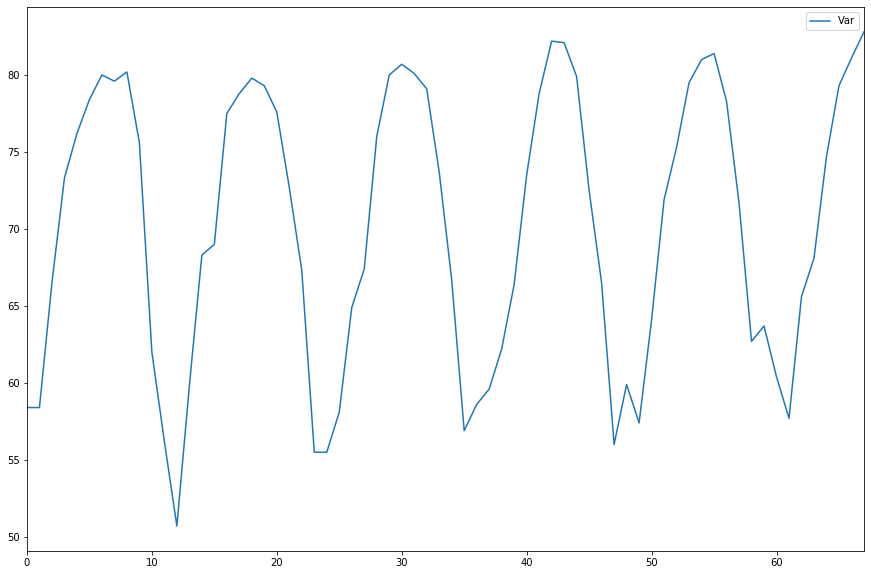

In [5]:
df[['Var']].plot(figsize=(15,10))

In [6]:
model=sm.tsa.statespace.SARIMAX(df['Var'],order=(1, 0, 0),seasonal_order=(1,1,1,12))
results=model.fit()

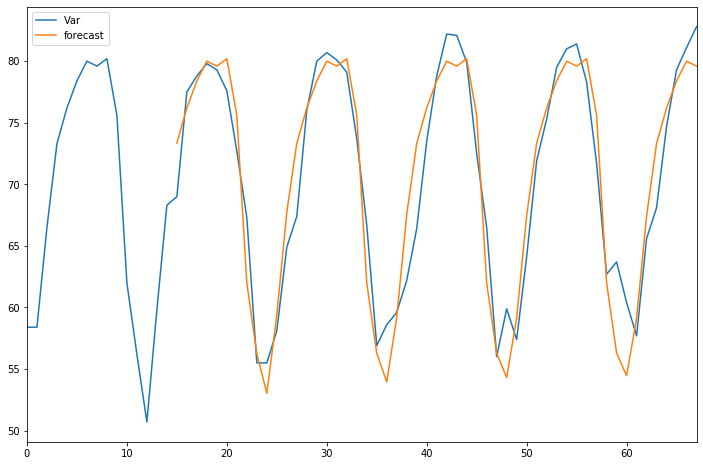

In [7]:
df['forecast']=results.predict(start=15,end=67,dynamic=True)
df[['Var','forecast']].plot(figsize=(12,8))

In [8]:
predicted=df['forecast'][15:]

In [9]:
true=df['Var'][15:]

In [10]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(true,predicted)

2.3998131029355605

In [11]:
future_dates=[df.index[-1]+i for i in range(0,5)]

In [12]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [13]:
future_datest_df

,ID,Var,forecast
68,NaN,NaN,NaN
69,NaN,NaN,NaN
70,NaN,NaN,NaN
71,NaN,NaN,NaN


In [14]:
future_df=pd.concat([df,future_datest_df])

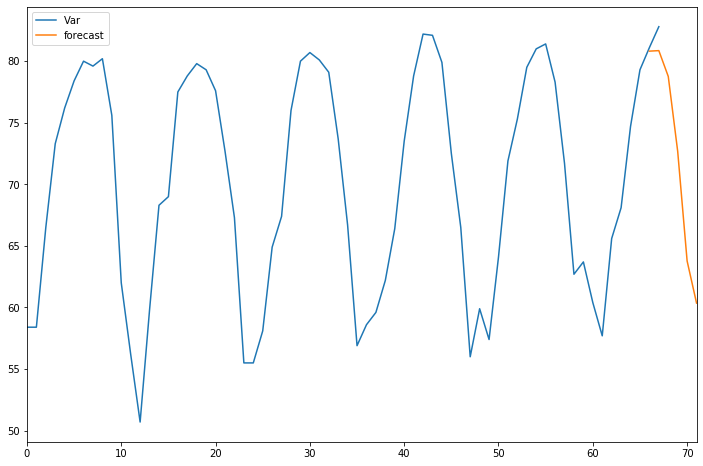

In [15]:
future_df['forecast'] = results.predict(start = 66, end = 71, dynamic= True)  
future_df[['Var', 'forecast']].plot(figsize=(12, 8))

In [16]:
future_df['forecast'][66:]

66    80.814424
67    80.856676
68    78.763467
69    72.681089
70    63.775204
71    60.355723
Name: forecast, dtype: float64